# goal is to predict the sales price of a property given certain parameters

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('C://Users//Sparsh//Documents//GitHub//House-Price-Prediction//AmesHousing//AmesHousing.xls')

In [3]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

## Finding and dealing with missing values

In [5]:
#removing PID and Order columns
df = df.drop(['PID','Order'], axis = 1)
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [6]:
def MissingValPercentage(df):
    percentnan = df.isnull().sum() * 100 / len(df)
    percentnan = percentnan[percentnan > 0.0]
    return percentnan

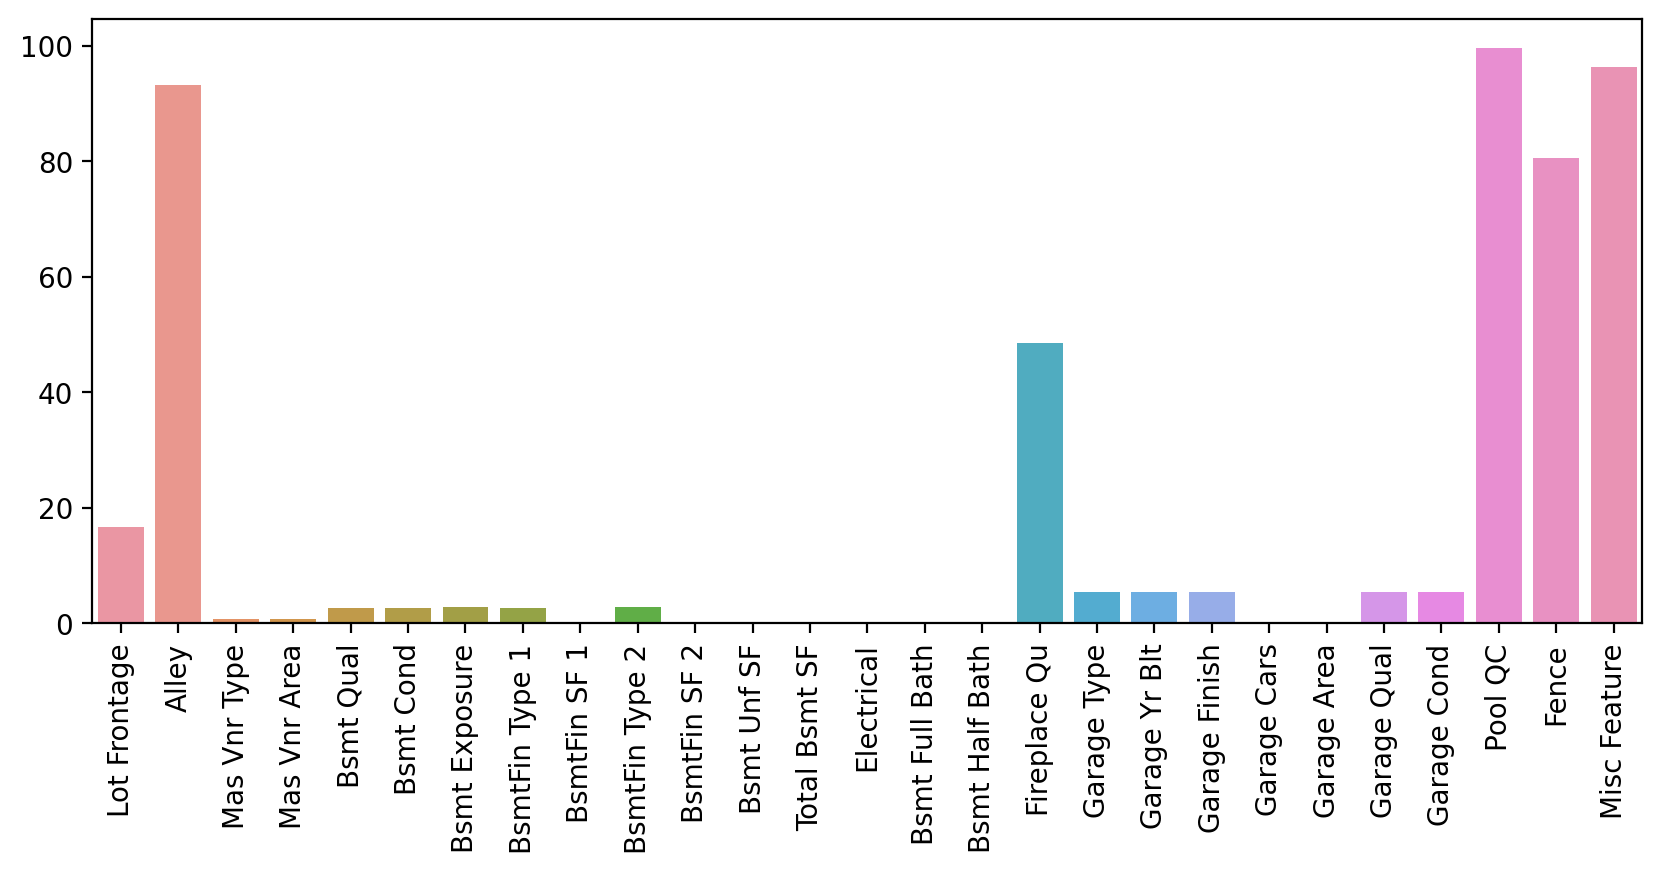

In [7]:
MissingVals = MissingValPercentage(df)
plt.figure(figsize=(10,4), dpi = 200)
sns.barplot(x = MissingVals.index, y = MissingVals)
plt.xticks(rotation = 90);

In [8]:
MissingVals

Lot Frontage      16.723549
Alley             93.242321
Mas Vnr Type       0.784983
Mas Vnr Area       0.784983
Bsmt Qual          2.730375
Bsmt Cond          2.730375
Bsmt Exposure      2.832765
BsmtFin Type 1     2.730375
BsmtFin SF 1       0.034130
BsmtFin Type 2     2.764505
BsmtFin SF 2       0.034130
Bsmt Unf SF        0.034130
Total Bsmt SF      0.034130
Electrical         0.034130
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
Fireplace Qu      48.532423
Garage Type        5.358362
Garage Yr Blt      5.426621
Garage Finish      5.426621
Garage Cars        0.034130
Garage Area        0.034130
Garage Qual        5.426621
Garage Cond        5.426621
Pool QC           99.556314
Fence             80.477816
Misc Feature      96.382253
dtype: float64

### removing the rows for columns having percentage of missing values < 1 %

(0.0, 1.0)

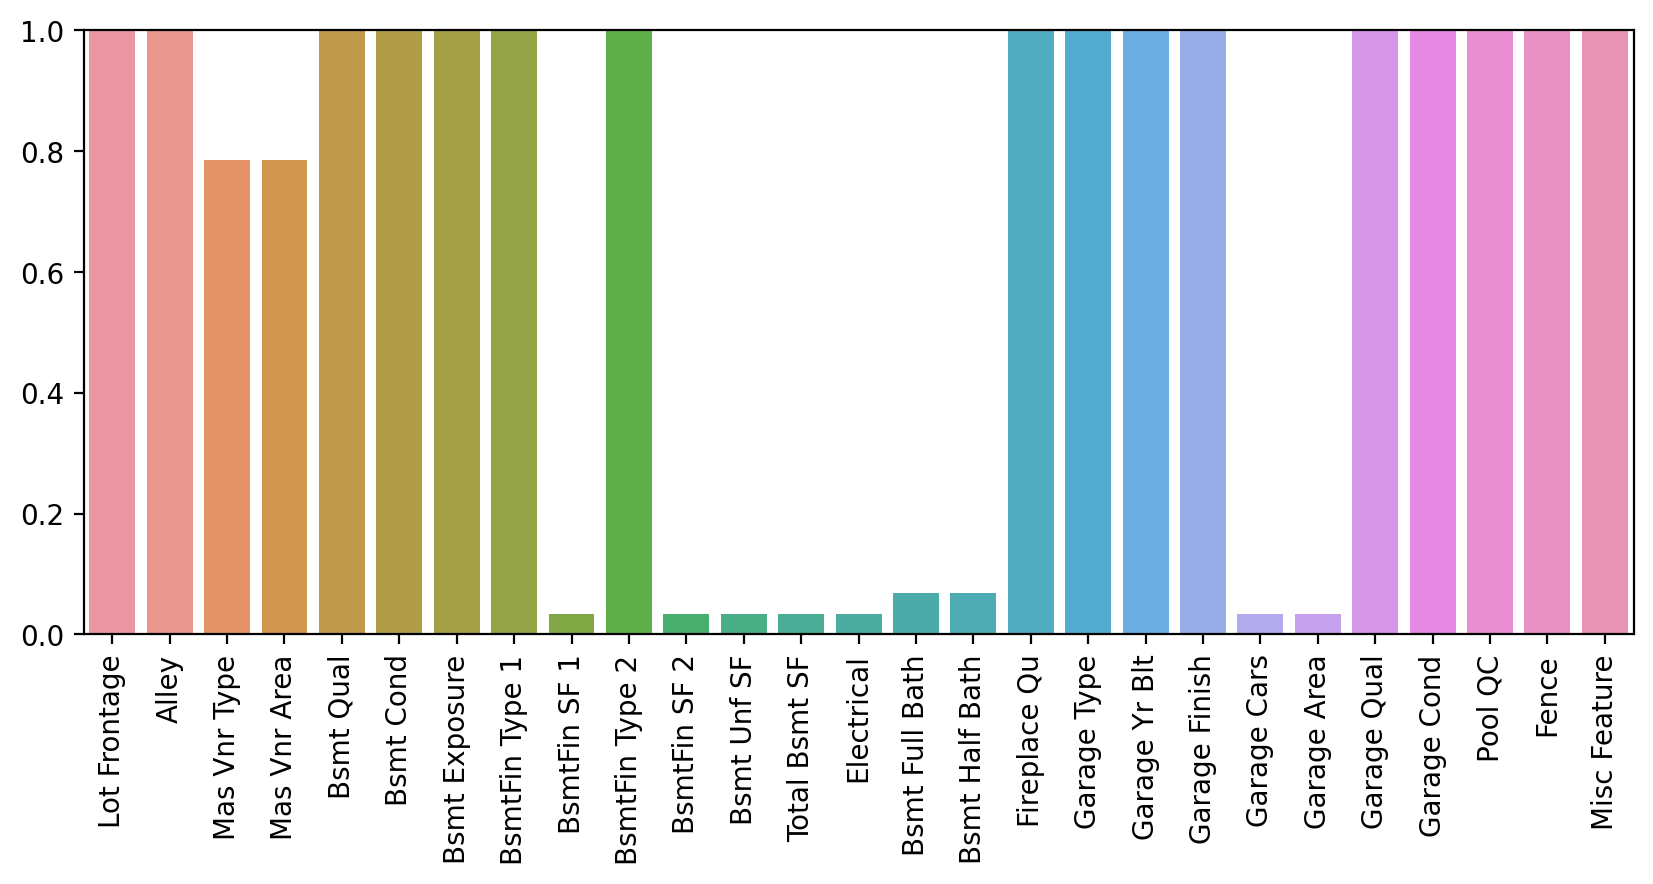

In [9]:
plt.figure(figsize=(10,4), dpi = 200)
sns.barplot(x = MissingVals.index, y = MissingVals)
plt.xticks(rotation = 90);
plt.ylim(0,1)

In [10]:
columns = []
for col in MissingVals.index:
    if(MissingVals[col] < 0.8):
        columns.append(col)

df = df.dropna(subset=columns)

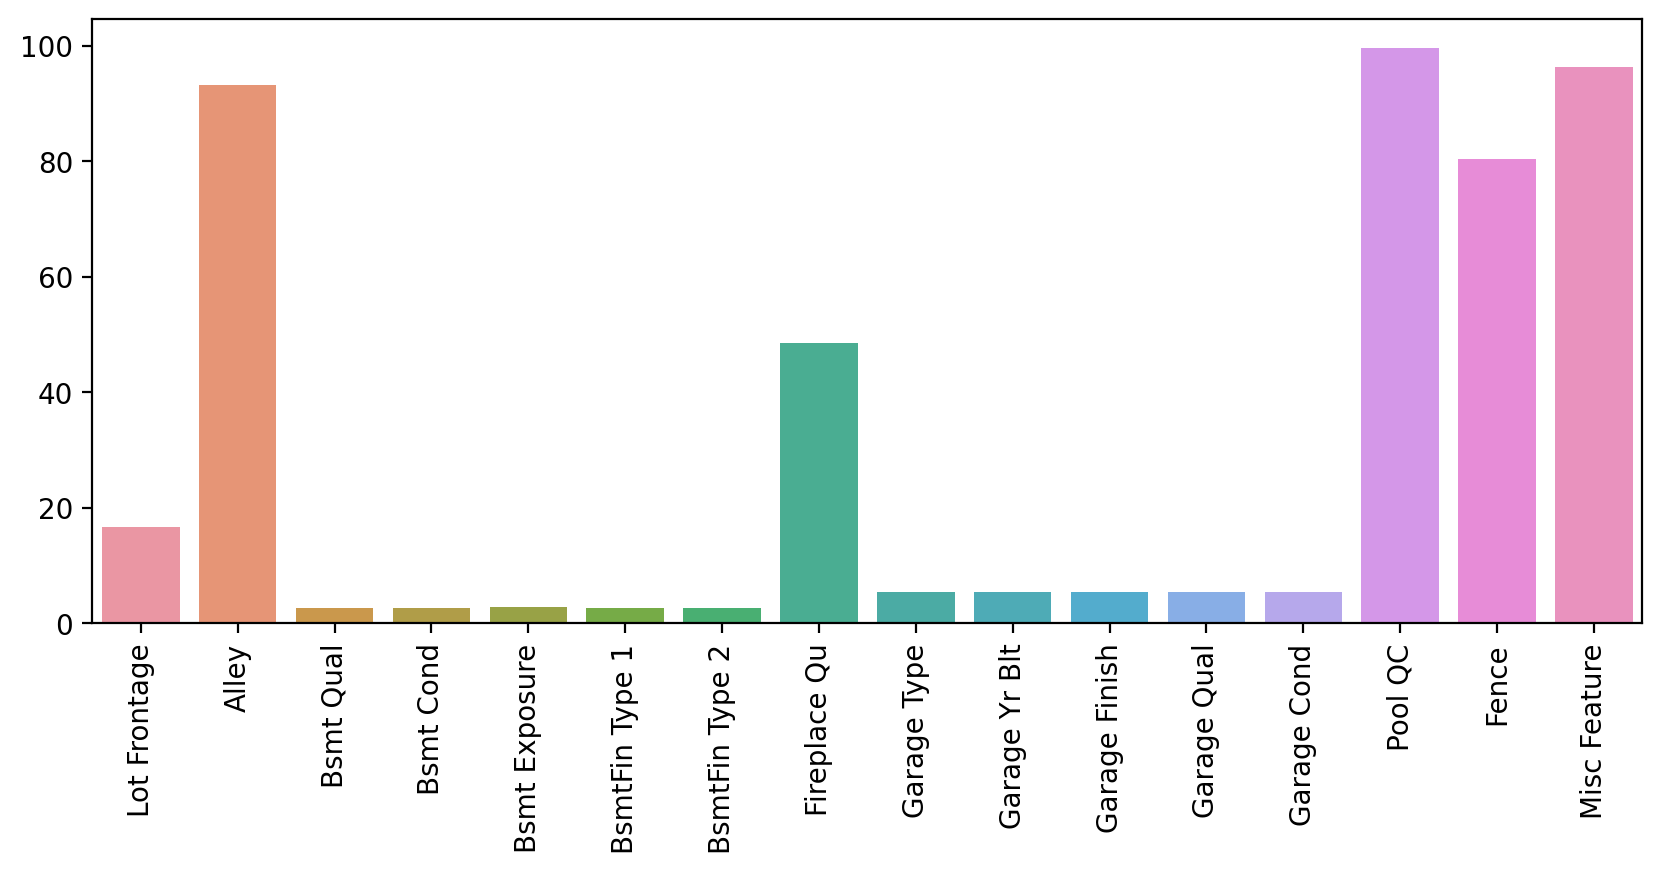

In [11]:
MissingVals = MissingValPercentage(df)
plt.figure(figsize=(10,4), dpi = 200)
sns.barplot(x = MissingVals.index, y = MissingVals)
plt.xticks(rotation = 90);

In [12]:
#filling in string values for columns with string data
bsmt_str_cols = ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [13]:
garage_str_cols = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
df[garage_str_cols] = df[garage_str_cols].fillna('None')

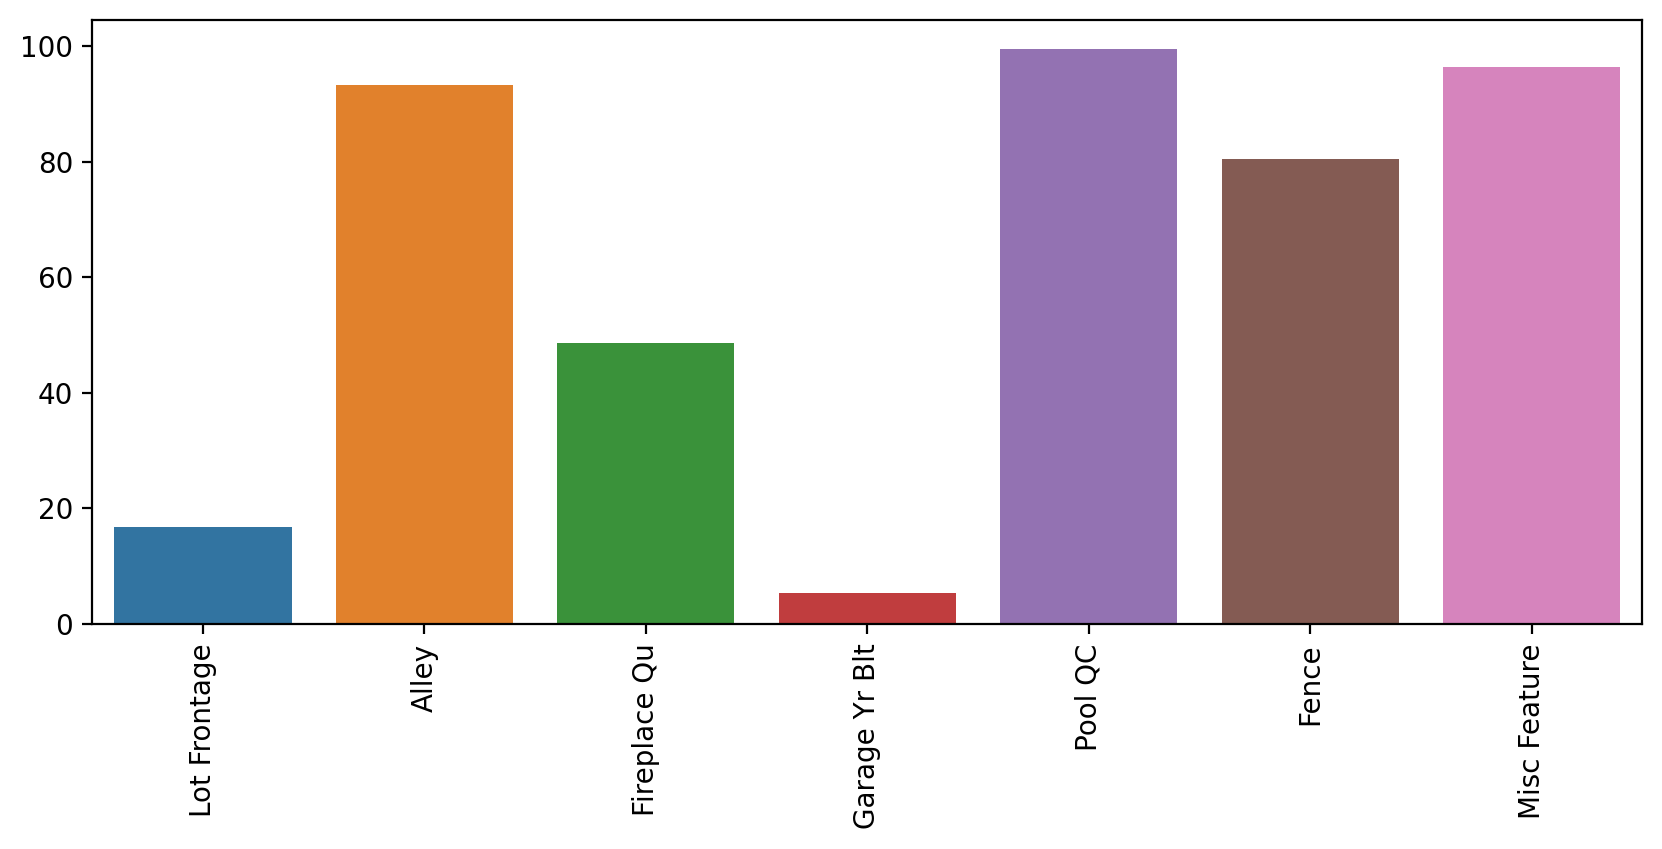

In [14]:
MissingVals = MissingValPercentage(df)
plt.figure(figsize=(10,4), dpi = 200)
sns.barplot(x = MissingVals.index, y = MissingVals)
plt.xticks(rotation = 90);

In [15]:
df.drop(['Misc Feature','Pool QC','Fence','Alley'], axis = 1, inplace = True)

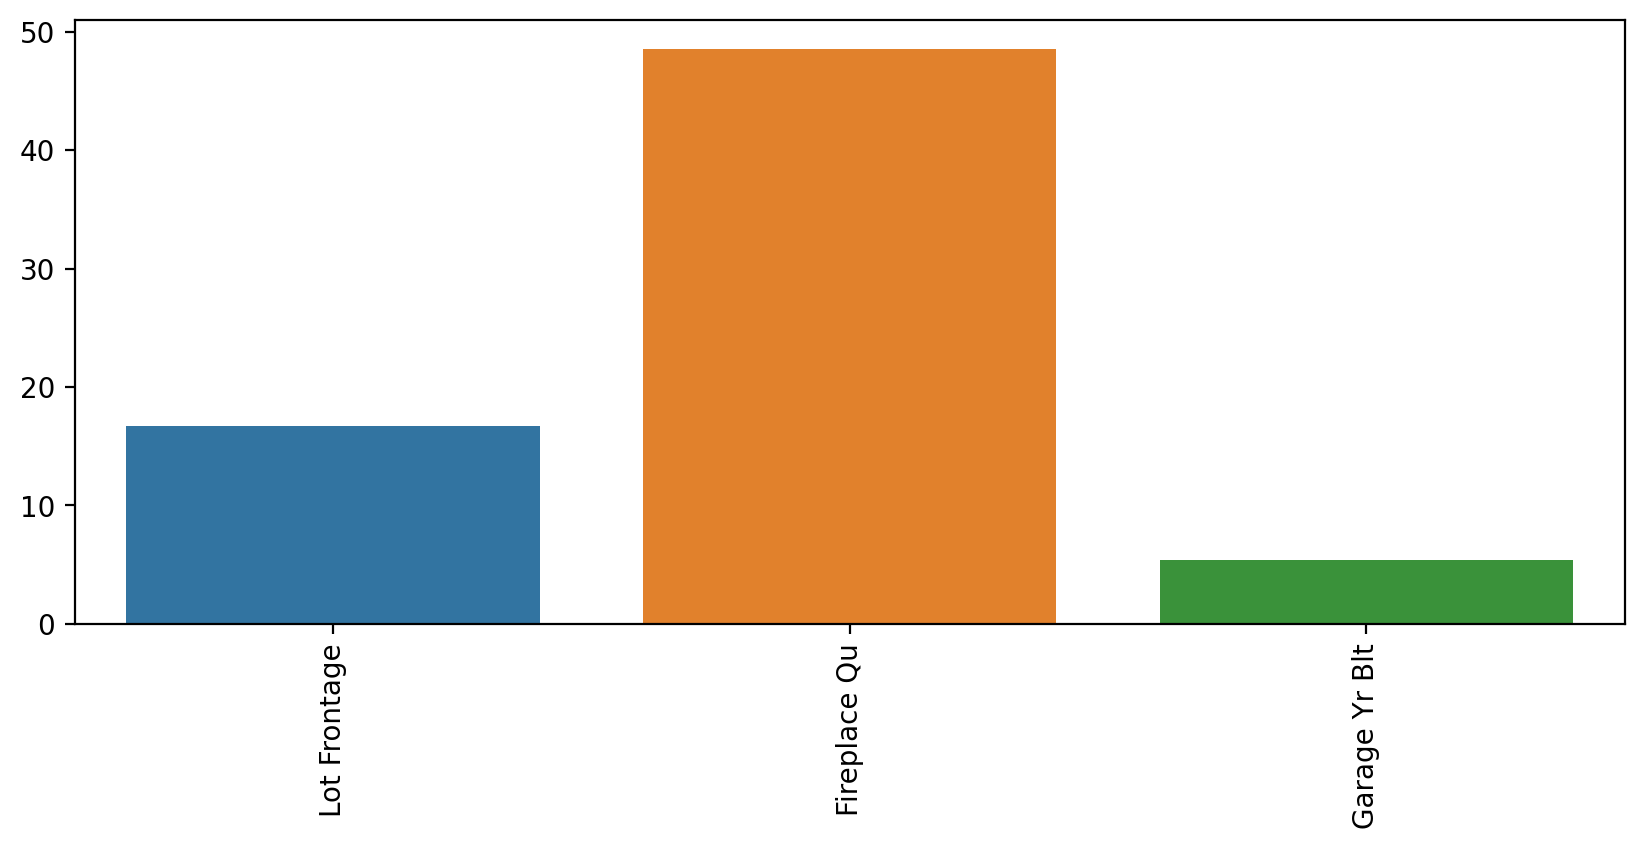

In [16]:
MissingVals = MissingValPercentage(df)
plt.figure(figsize=(10,4), dpi = 200)
sns.barplot(x = MissingVals.index, y = MissingVals)
plt.xticks(rotation = 90);

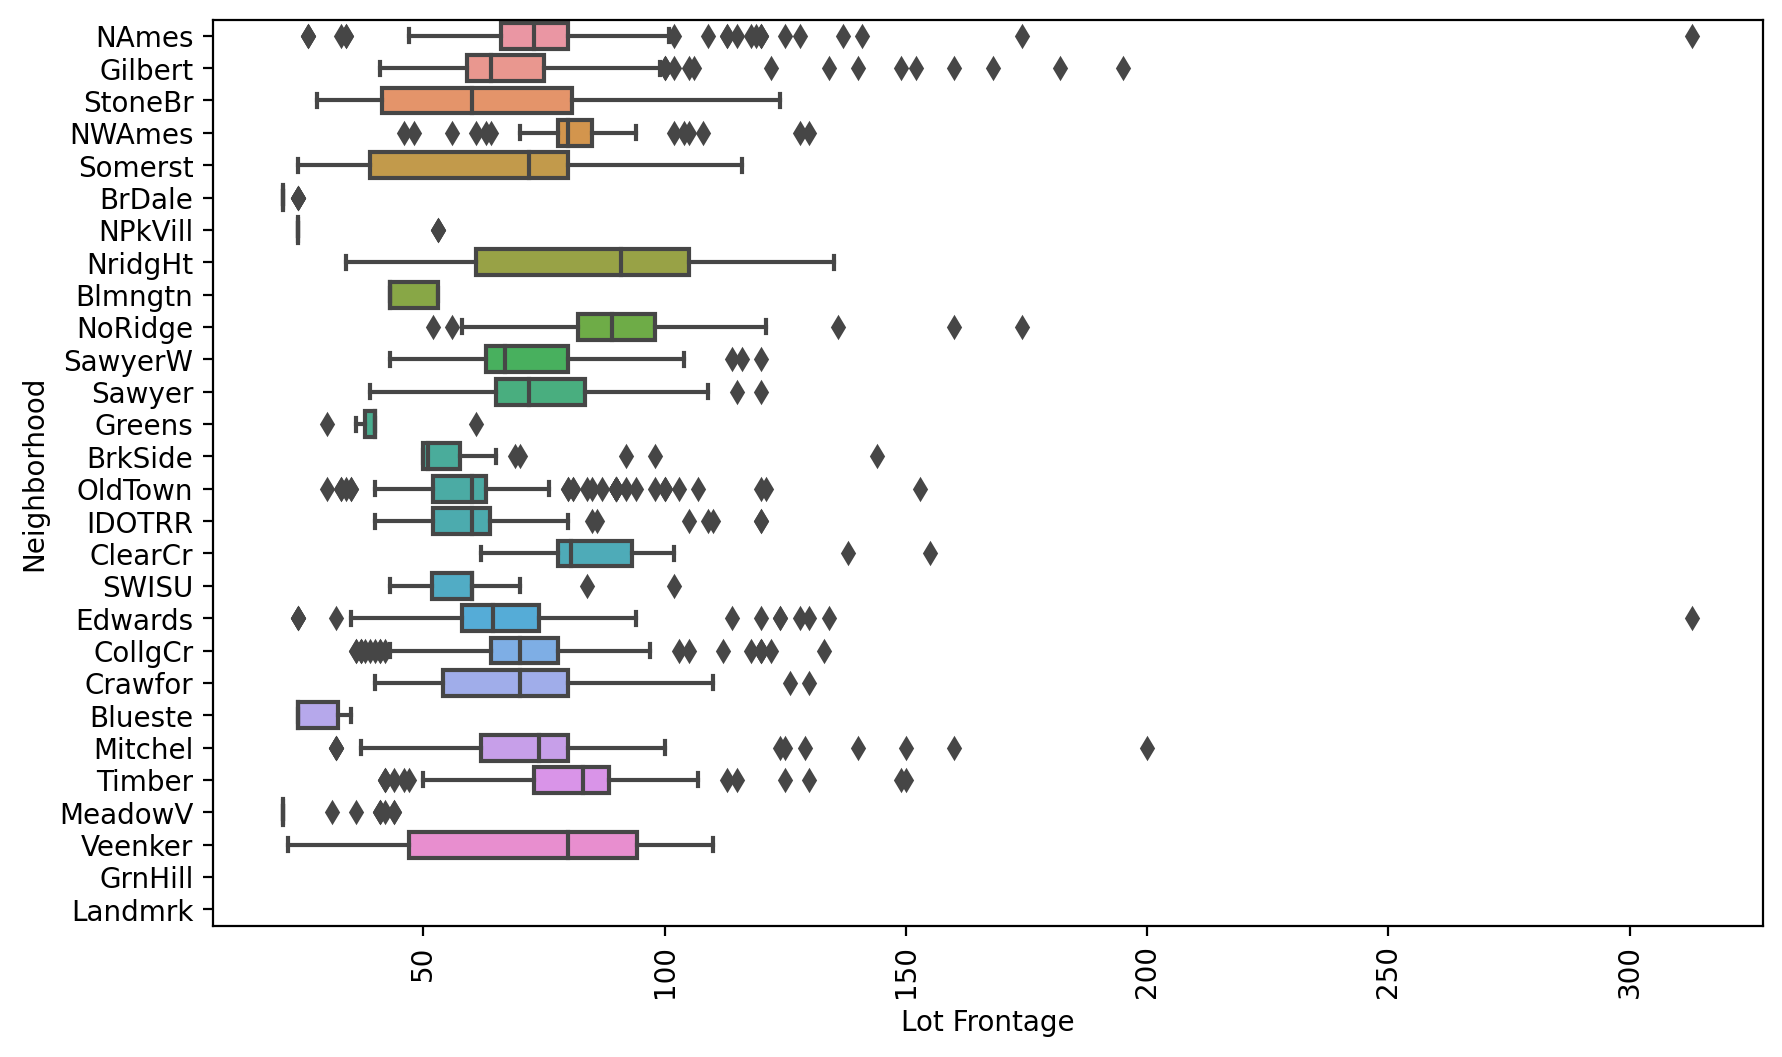

In [17]:
plt.figure(figsize=(10,6), dpi = 200)
sns.boxplot(y = 'Neighborhood', x = 'Lot Frontage', data = df)
plt.xticks(rotation = 90);

In [18]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [19]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2256,120,RM,NaN,9763,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2007,WD,Normal,330000
2788,160,RH,NaN,3612,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,137000
2892,120,RM,NaN,8239,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,11,2006,WD,Normal,230000


In [20]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [21]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [22]:
df.corr()['Garage Yr Blt'].sort_values()

Overall Cond      -0.326730
Enclosed Porch    -0.305261
Kitchen AbvGr     -0.093178
BsmtFin SF 2      -0.066504
Screen Porch      -0.060628
Bsmt Half Bath    -0.056796
Low Qual Fin SF   -0.051905
Bedroom AbvGr     -0.042712
Pool Area         -0.014103
Misc Val          -0.008517
Lot Area          -0.007133
Yr Sold           -0.002490
Mo Sold            0.016711
3Ssn Porch         0.022148
Lot Frontage       0.074838
2nd Flr SF         0.087262
Fireplaces         0.090203
MS SubClass        0.093391
Bsmt Full Bath     0.157697
TotRms AbvGrd      0.165891
Bsmt Unf SF        0.168368
BsmtFin SF 1       0.199000
Half Bath          0.226973
Wood Deck SF       0.227318
Open Porch SF      0.236082
Mas Vnr Area       0.254811
1st Flr SF         0.267513
Gr Liv Area        0.278381
Total Bsmt SF      0.350960
Full Bath          0.498541
SalePrice          0.531269
Garage Area        0.564329
Overall Qual       0.572960
Garage Cars        0.594581
Year Remod/Add     0.655820
Year Built         0

<AxesSubplot:xlabel='Year Built', ylabel='Garage Yr Blt'>

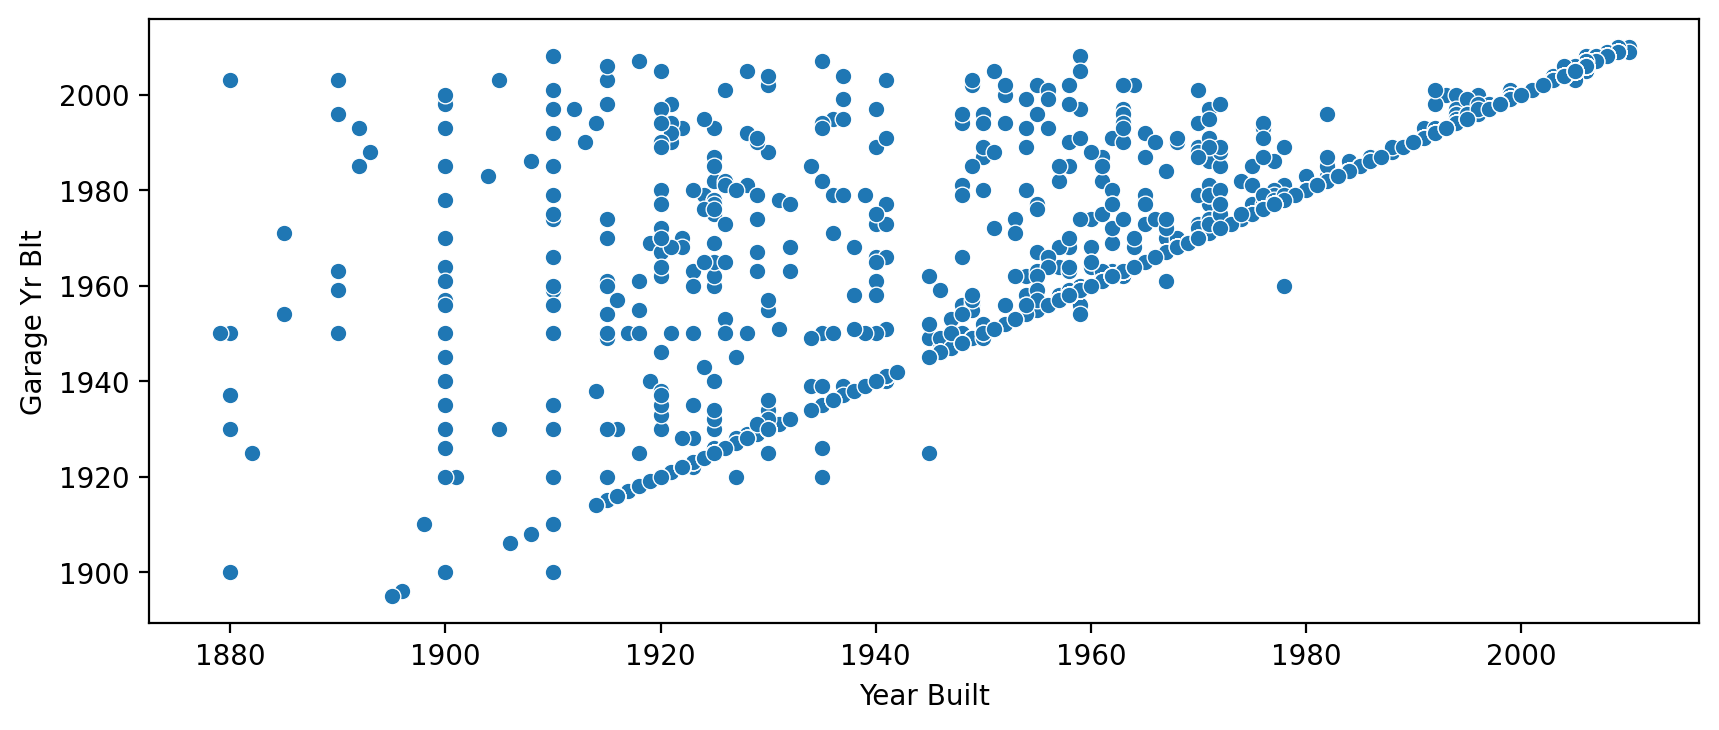

In [23]:
plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot(y = 'Garage Yr Blt', x = 'Year Built', data = df)
# we get an almost linear relationship and therefore we can substitute the missing values with the mean of the Garage Year built for that particular Year Built

In [24]:
df['Garage Yr Blt'] = df.groupby('Year Built')['Garage Yr Blt'].transform(lambda val: val.fillna(val.mean()))

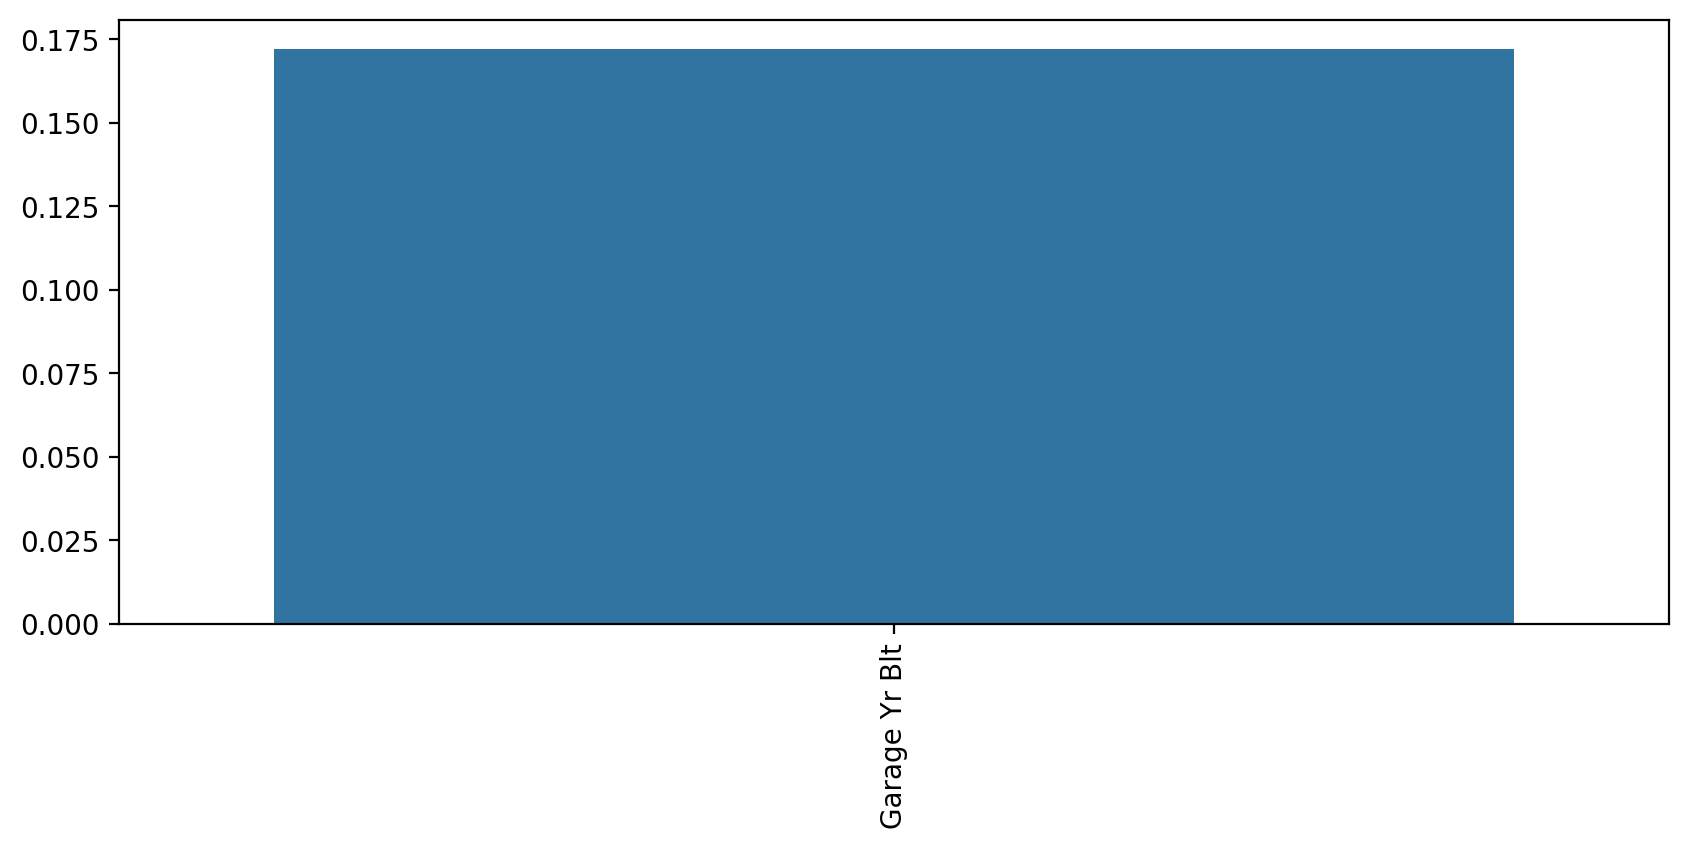

In [25]:
MissingVals = MissingValPercentage(df)
plt.figure(figsize=(10,4), dpi = 200)
sns.barplot(x = MissingVals.index, y = MissingVals)
plt.xticks(rotation = 90);

In [26]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [27]:
MissingVals = MissingValPercentage(df)
MissingVals

Series([], dtype: float64)

### Dealing with outliers in the dataset

In [28]:
cols = df.corr()['SalePrice'].sort_values(ascending=False).index
cols = cols.drop('SalePrice')

In [29]:
def FindOutliers(dataframe, cols):
    for col in cols:
        fig, axe = plt.subplots(figsize = (16,4), nrows=1, ncols=3)
        sns.boxplot(x = col, data = dataframe, ax=axe[0], color='blue')
        sns.histplot(x = col, data = dataframe, ax=axe[1], kde = True, color='Red')
        sns.scatterplot(x = col, y = 'SalePrice', data = dataframe, ax=axe[2], color='Green')
        fig.tight_layout()
        plt.show()
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        print('Column name : ', col)
        print('IQR : ', IQR)
        print('Q1 : ', Q1, ', Q3 : ', Q3)



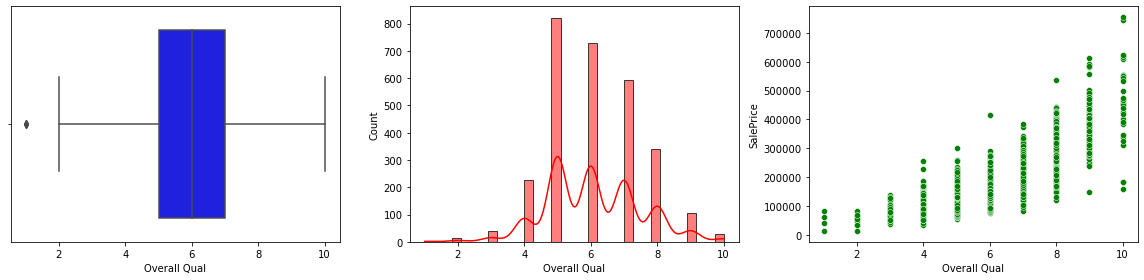

Column name :  Overall Qual
IQR :  2.0
Q1 :  5.0 , Q3 :  7.0


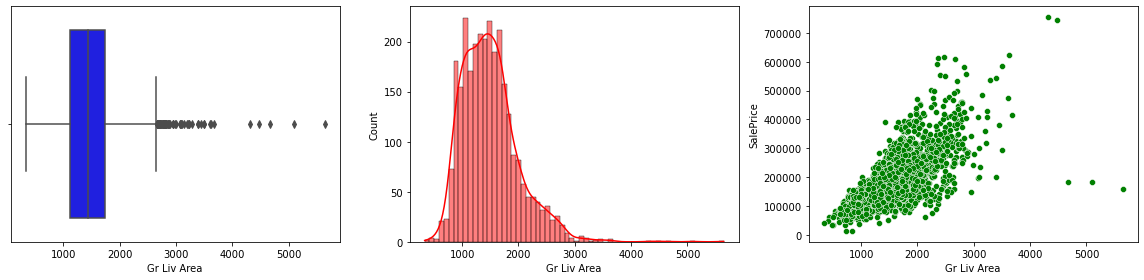

Column name :  Gr Liv Area
IQR :  616.0
Q1 :  1124.0 , Q3 :  1740.0


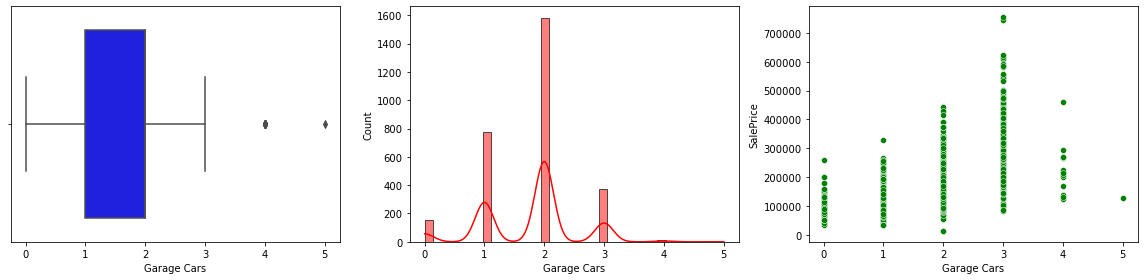

Column name :  Garage Cars
IQR :  1.0
Q1 :  1.0 , Q3 :  2.0


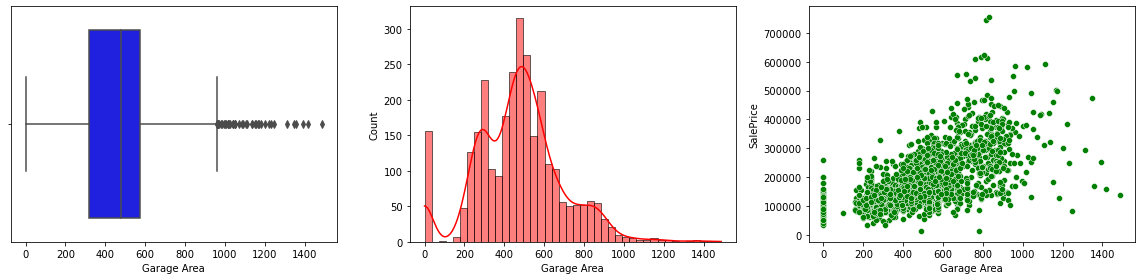

Column name :  Garage Area
IQR :  256.5
Q1 :  319.5 , Q3 :  576.0


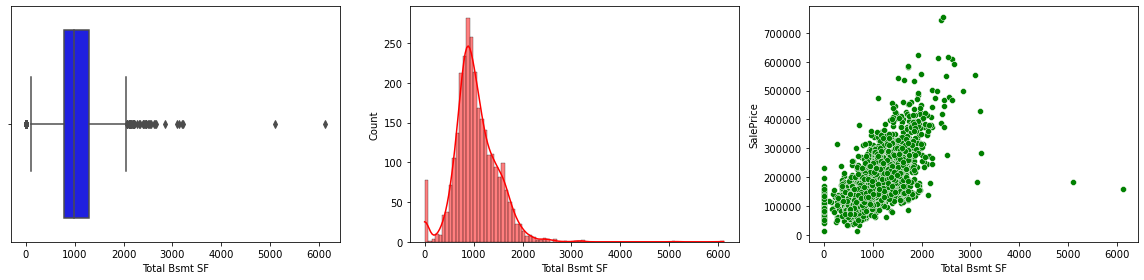

Column name :  Total Bsmt SF
IQR :  507.5
Q1 :  792.5 , Q3 :  1300.0


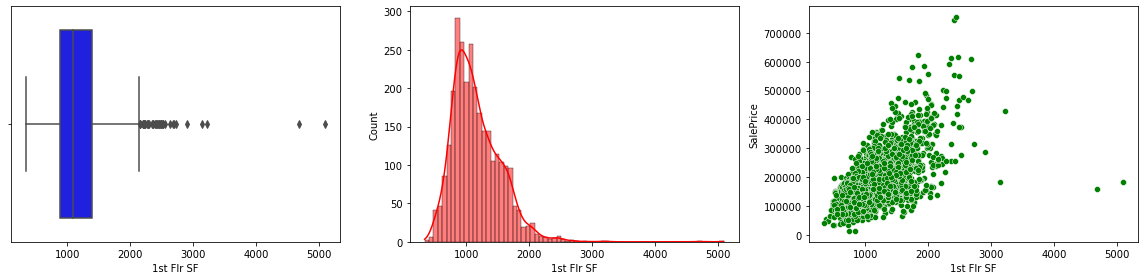

Column name :  1st Flr SF
IQR :  506.5
Q1 :  876.5 , Q3 :  1383.0


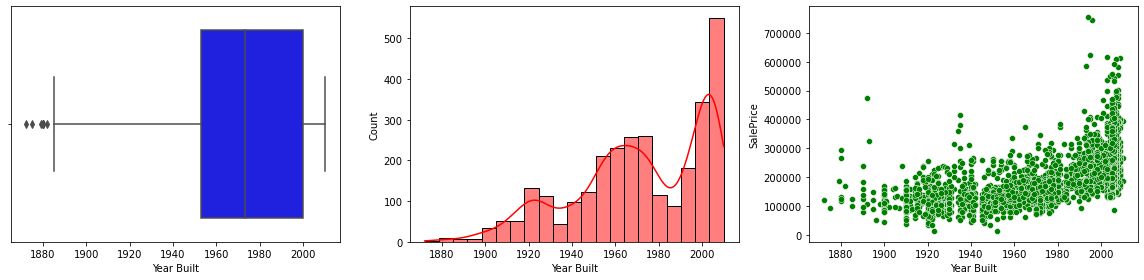

Column name :  Year Built
IQR :  47.0
Q1 :  1953.0 , Q3 :  2000.0


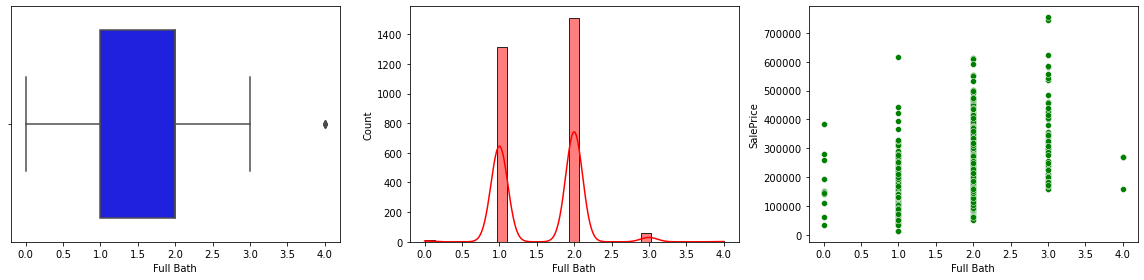

Column name :  Full Bath
IQR :  1.0
Q1 :  1.0 , Q3 :  2.0


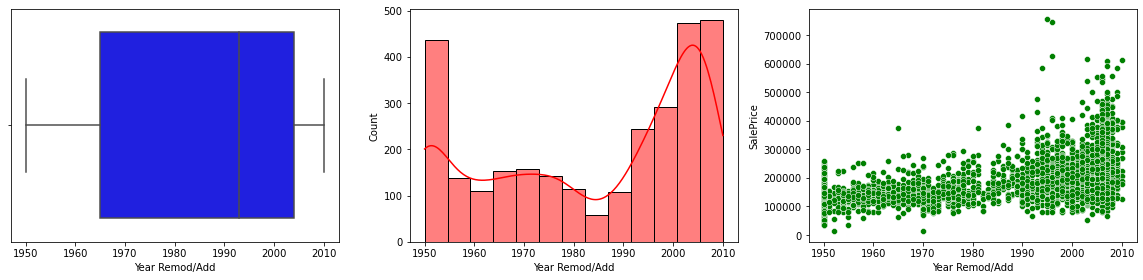

Column name :  Year Remod/Add
IQR :  39.0
Q1 :  1965.0 , Q3 :  2004.0


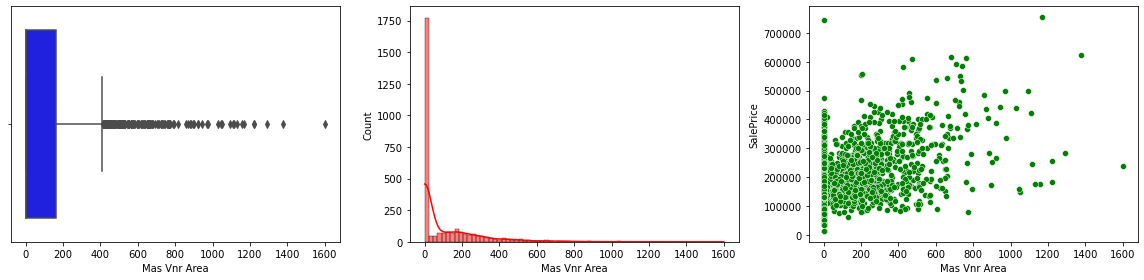

Column name :  Mas Vnr Area
IQR :  164.0
Q1 :  0.0 , Q3 :  164.0


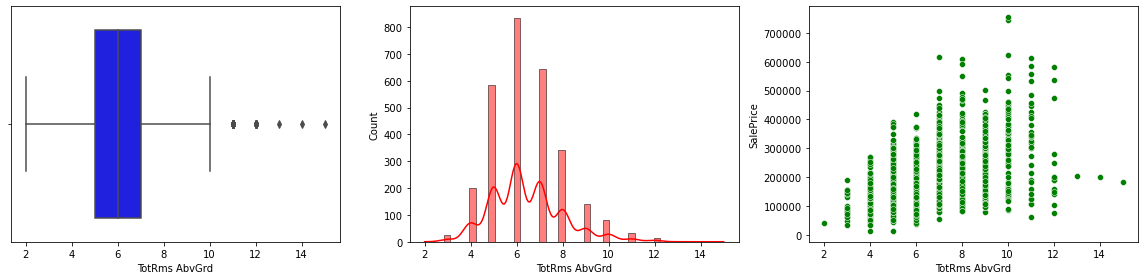

Column name :  TotRms AbvGrd
IQR :  2.0
Q1 :  5.0 , Q3 :  7.0


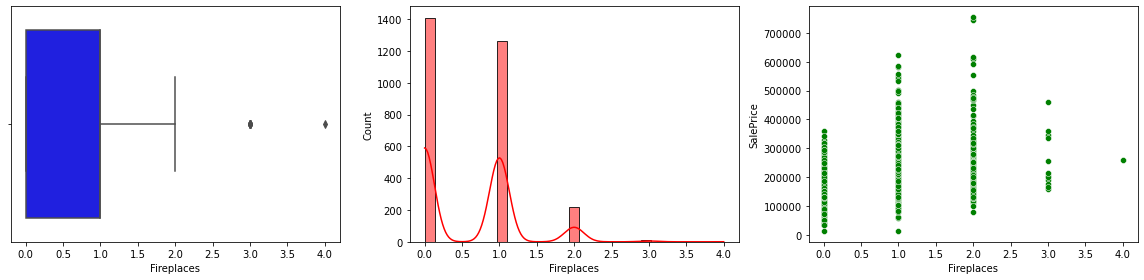

Column name :  Fireplaces
IQR :  1.0
Q1 :  0.0 , Q3 :  1.0


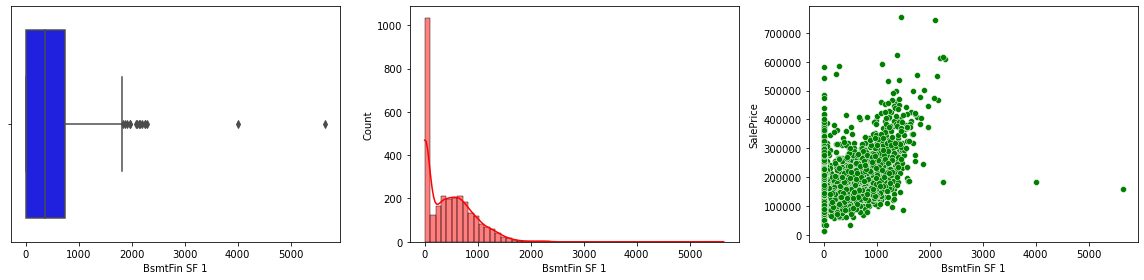

Column name :  BsmtFin SF 1
IQR :  734.0
Q1 :  0.0 , Q3 :  734.0


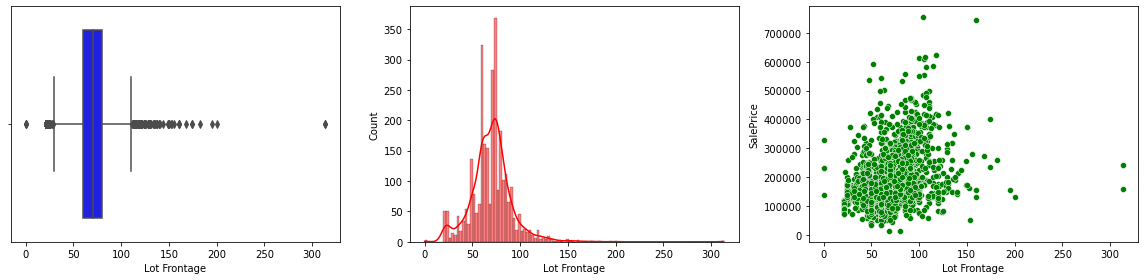

Column name :  Lot Frontage
IQR :  20.0
Q1 :  60.0 , Q3 :  80.0


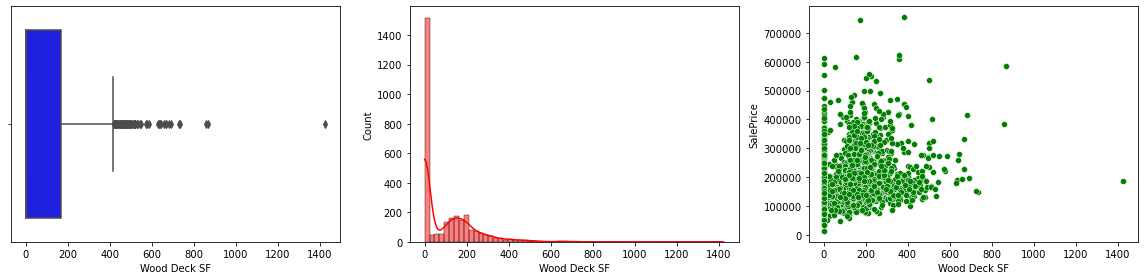

Column name :  Wood Deck SF
IQR :  168.0
Q1 :  0.0 , Q3 :  168.0


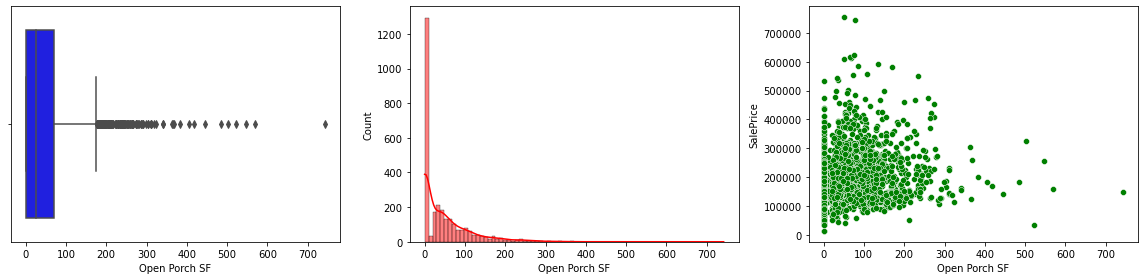

Column name :  Open Porch SF
IQR :  70.0
Q1 :  0.0 , Q3 :  70.0


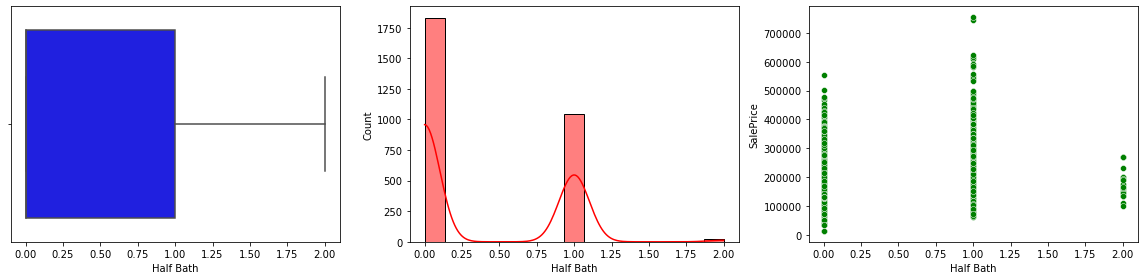

Column name :  Half Bath
IQR :  1.0
Q1 :  0.0 , Q3 :  1.0


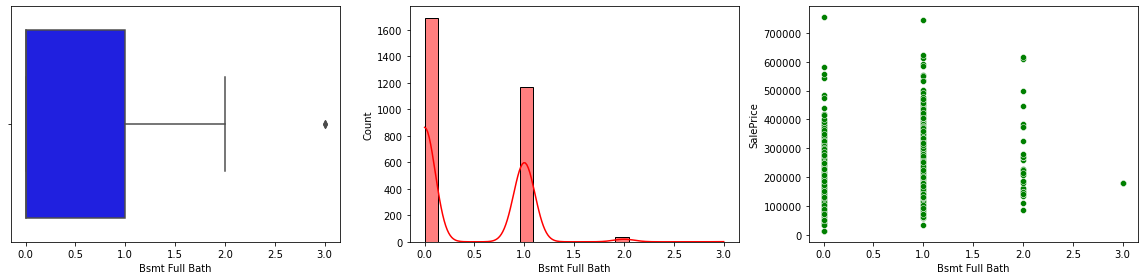

Column name :  Bsmt Full Bath
IQR :  1.0
Q1 :  0.0 , Q3 :  1.0


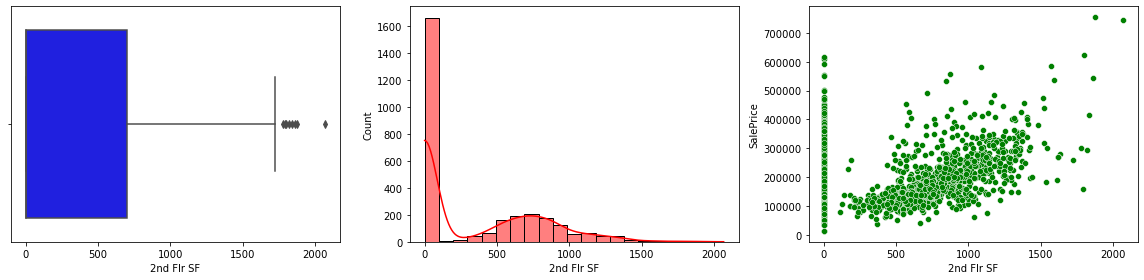

Column name :  2nd Flr SF
IQR :  702.0
Q1 :  0.0 , Q3 :  702.0


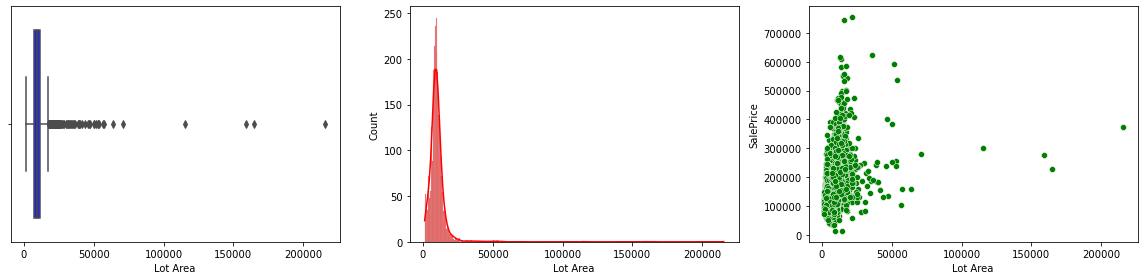

Column name :  Lot Area
IQR :  4093.0
Q1 :  7424.5 , Q3 :  11517.5


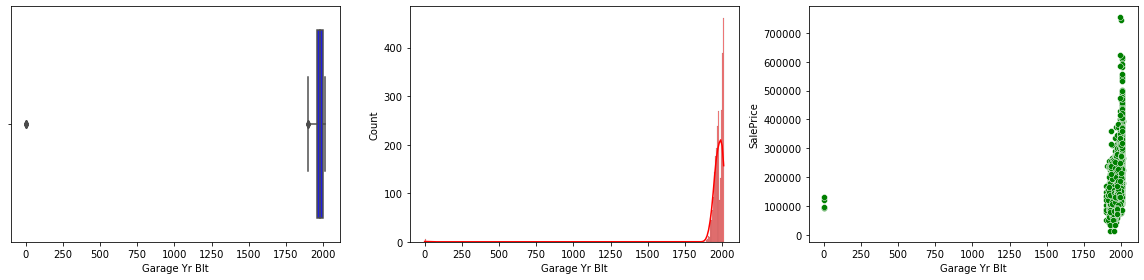

Column name :  Garage Yr Blt
IQR :  42.0
Q1 :  1959.0 , Q3 :  2001.0


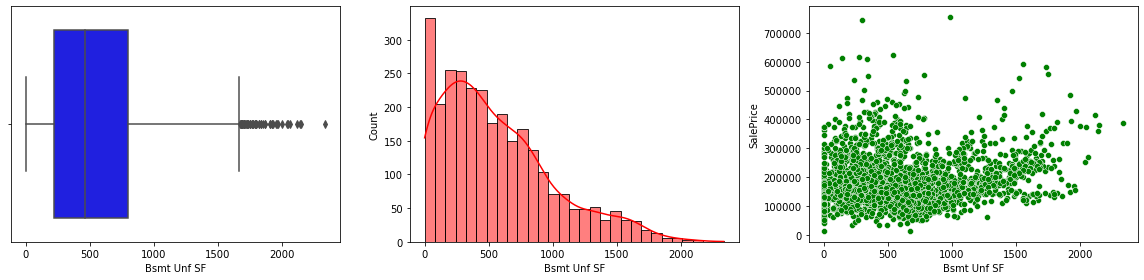

Column name :  Bsmt Unf SF
IQR :  581.5
Q1 :  218.5 , Q3 :  800.0


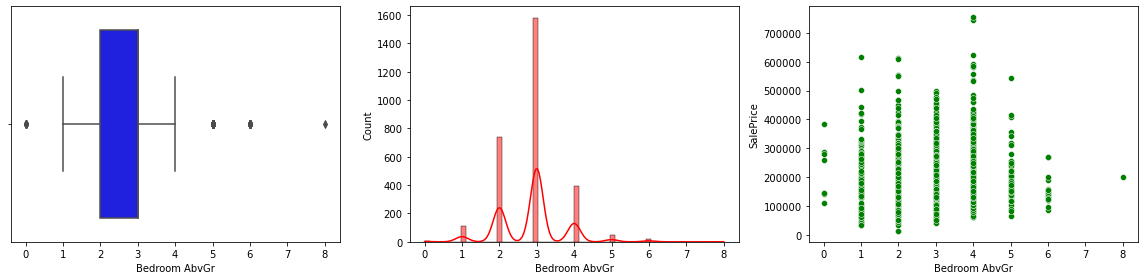

Column name :  Bedroom AbvGr
IQR :  1.0
Q1 :  2.0 , Q3 :  3.0


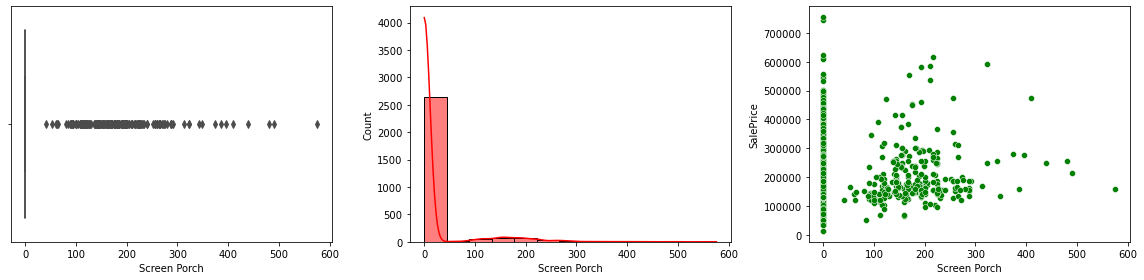

Column name :  Screen Porch
IQR :  0.0
Q1 :  0.0 , Q3 :  0.0


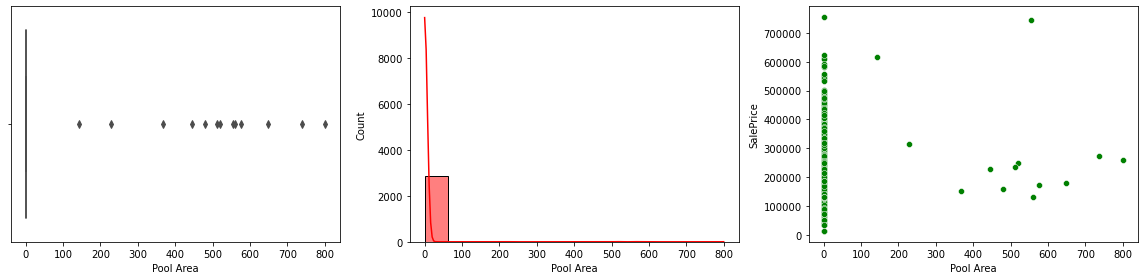

Column name :  Pool Area
IQR :  0.0
Q1 :  0.0 , Q3 :  0.0


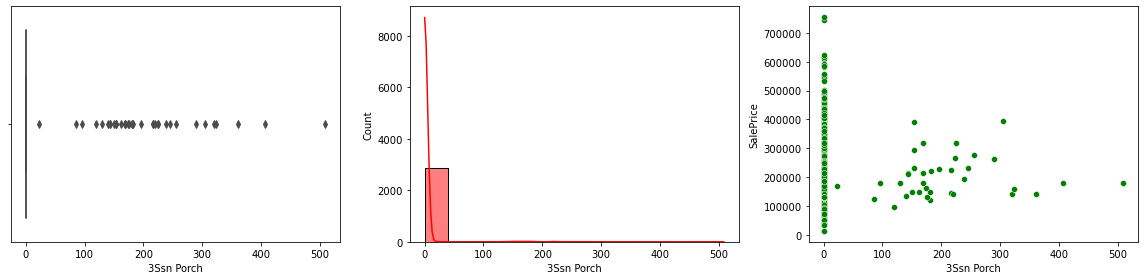

Column name :  3Ssn Porch
IQR :  0.0
Q1 :  0.0 , Q3 :  0.0


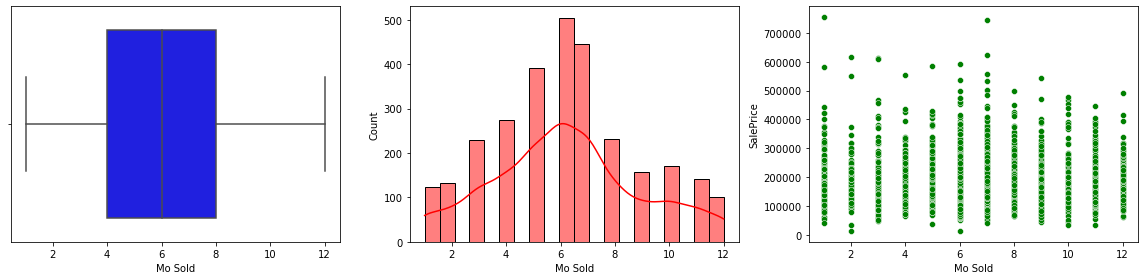

Column name :  Mo Sold
IQR :  4.0
Q1 :  4.0 , Q3 :  8.0


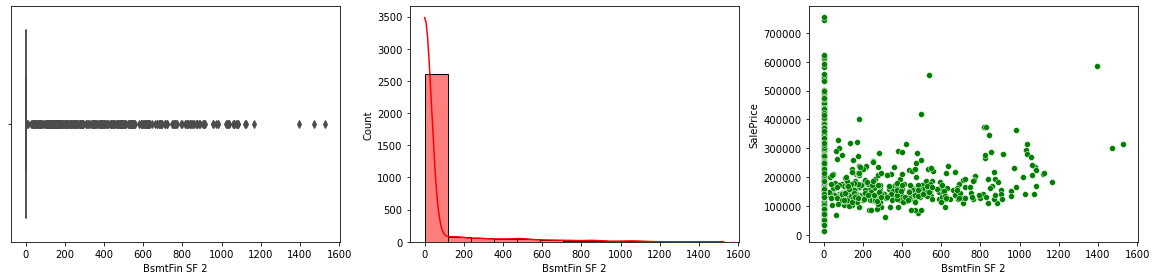

Column name :  BsmtFin SF 2
IQR :  0.0
Q1 :  0.0 , Q3 :  0.0


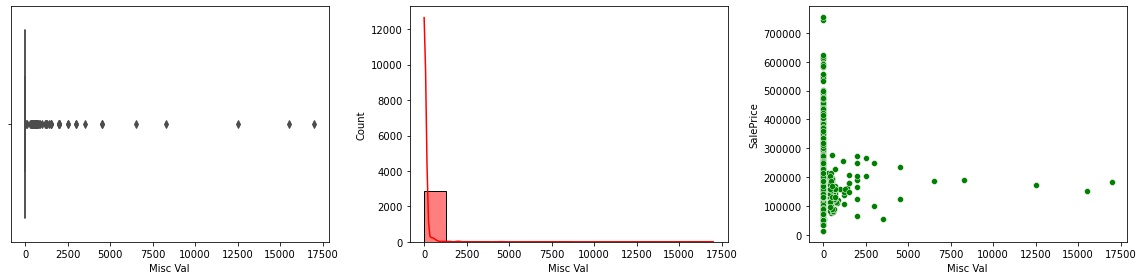

Column name :  Misc Val
IQR :  0.0
Q1 :  0.0 , Q3 :  0.0


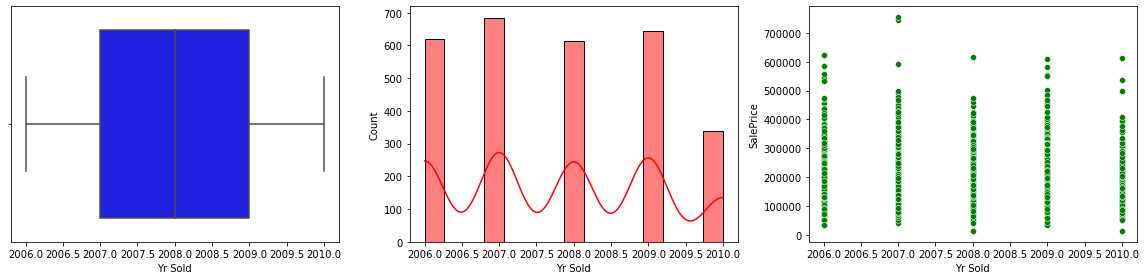

Column name :  Yr Sold
IQR :  2.0
Q1 :  2007.0 , Q3 :  2009.0


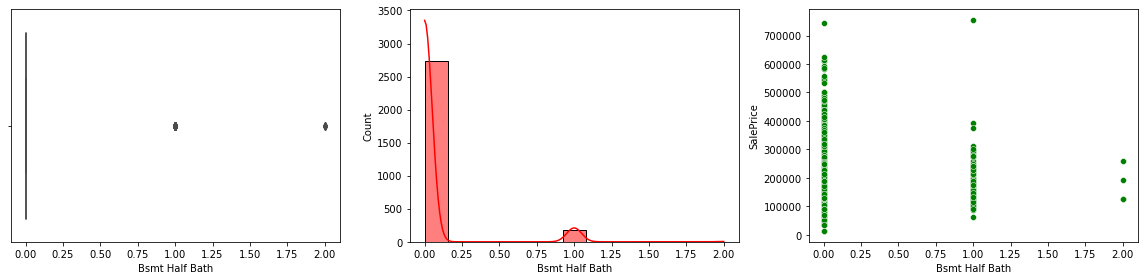

Column name :  Bsmt Half Bath
IQR :  0.0
Q1 :  0.0 , Q3 :  0.0


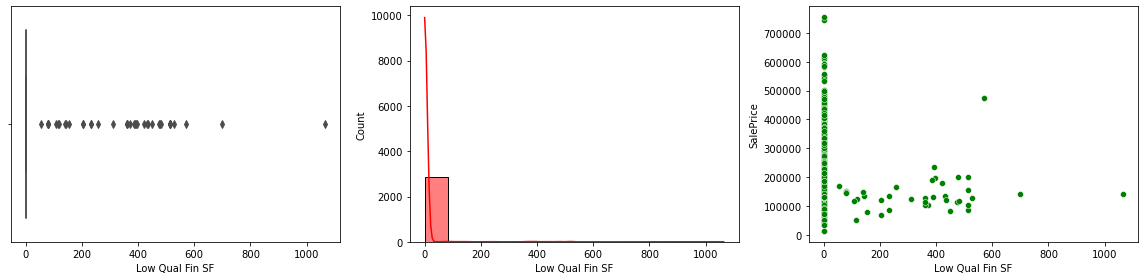

Column name :  Low Qual Fin SF
IQR :  0.0
Q1 :  0.0 , Q3 :  0.0


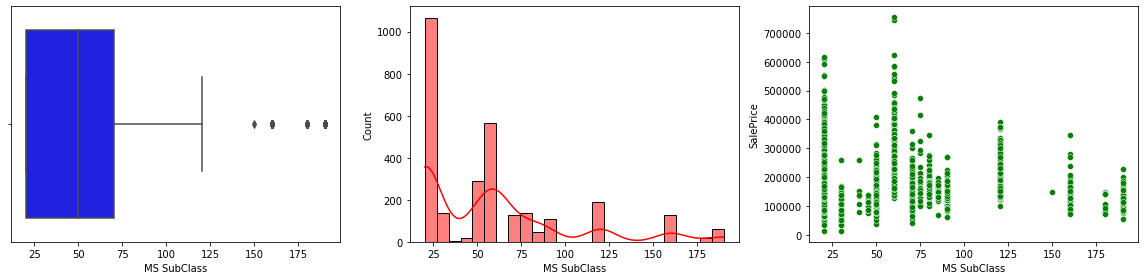

Column name :  MS SubClass
IQR :  50.0
Q1 :  20.0 , Q3 :  70.0


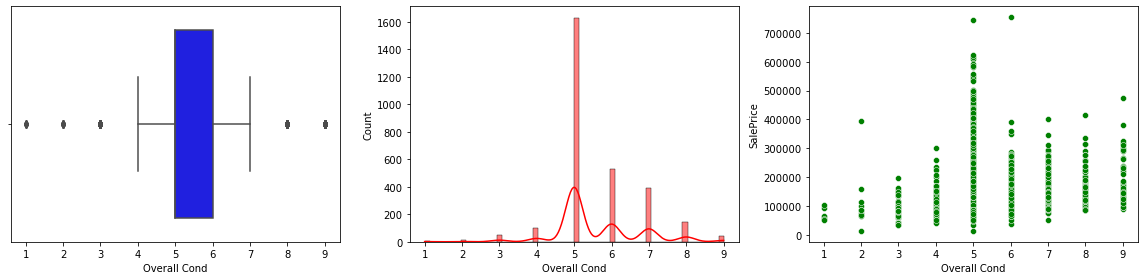

Column name :  Overall Cond
IQR :  1.0
Q1 :  5.0 , Q3 :  6.0


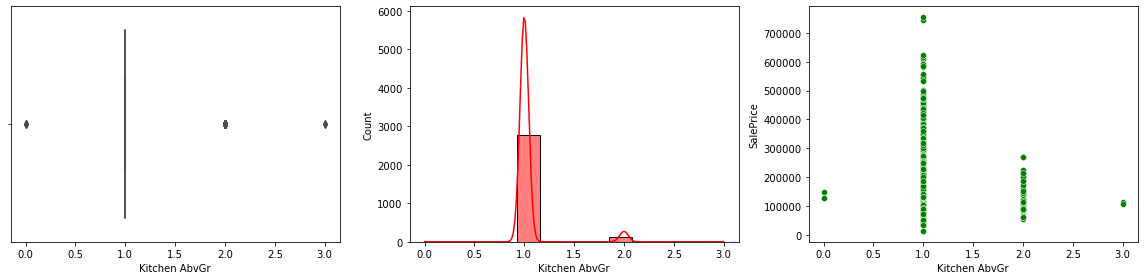

Column name :  Kitchen AbvGr
IQR :  0.0
Q1 :  1.0 , Q3 :  1.0


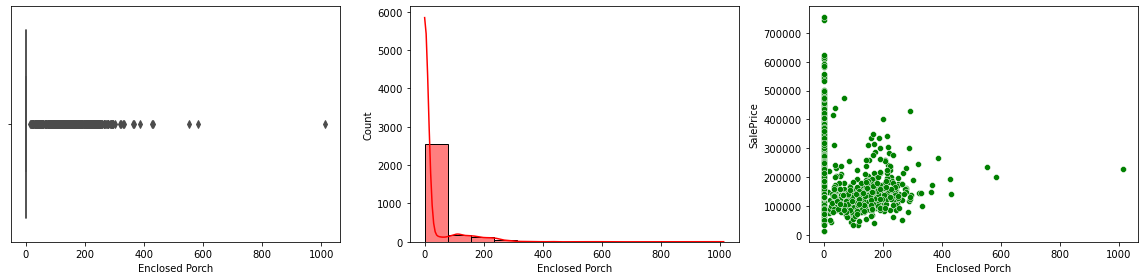

Column name :  Enclosed Porch
IQR :  0.0
Q1 :  0.0 , Q3 :  0.0


In [30]:
FindOutliers(df, cols)

In [38]:
indices = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 300000)].index
df = df.drop(indices, axis=0) # outliers in the Gr Liv Area column

In [39]:
indices = df[(df['Garage Area'] < 1000) & (df['SalePrice'] > 700000)].index # outliers in the Garage Area column
df = df.drop(indices, axis=0)

In [40]:
indices = df[df['Total Bsmt SF'] > 4000].index # outliers in the Total Bsmt SF column
df = df.drop(indices, axis=0)

In [41]:
indices = df[(df['1st Flr SF'] > 3000) & (df['SalePrice'] < 200000)].index # outliers in the 1st Flr SF column
df = df.drop(indices, axis=0)


## Dealing with categorical data 

In [45]:
df['MS SubClass'].values
#this column has numerical encoding for the type of house. We need to convert this to a categorical variable

array([20, 20, 20, ..., 85, 20, 60], dtype=int64)

In [ ]:
"""MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

"""

In [52]:
df['MS SubClass'] = df['MS SubClass'].apply(str)
df['MS SubClass']

0       20
1       20
2       20
3       20
4       60
        ..
2925    80
2926    20
2927    85
2928    20
2929    60
Name: MS SubClass, Length: 2898, dtype: object

In [53]:
df_objs =  df.select_dtypes(include='object')
df_nums = df.select_dtypes(exclude= 'object')

In [54]:
df_objs = pd.get_dummies(df_objs, drop_first=True)
df = pd.concat([df_objs,df_nums], axis=1)

In [55]:
df

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,210,62,0,0,0,0,0,5,2010,215000
1,0,0,0,0,1,0,0,0,0,0,...,140,0,0,0,120,0,0,6,2010,105000
2,0,0,0,0,1,0,0,0,0,0,...,393,36,0,0,0,0,12500,6,2010,172000
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,2010,244000
4,0,0,0,0,0,0,0,0,0,1,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,120,0,0,0,0,0,0,3,2006,142500
2926,0,0,0,0,1,0,0,0,0,0,...,164,0,0,0,0,0,0,6,2006,131000
2927,0,0,0,0,0,0,0,0,0,0,...,80,32,0,0,0,0,700,7,2006,132000
2928,0,0,0,0,1,0,0,0,0,0,...,240,38,0,0,0,0,0,4,2006,170000


In [ ]:
df.to_csv('final_df.csv')